In [12]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [10]:
# Load datasets
df_train = pd.read_csv("../resources/df_train_preprocessed.csv")
df_validation = pd.read_csv("../resources/df_val_preprocessed.csv")
df_test = pd.read_csv("../resources/df_test_preprocessed.csv")

# Load vectorizer
vectorizer = joblib.load("../artifacts/vectorizer.joblib")

# Load trained model
best_model = joblib.load("../artifacts/model.joblib")


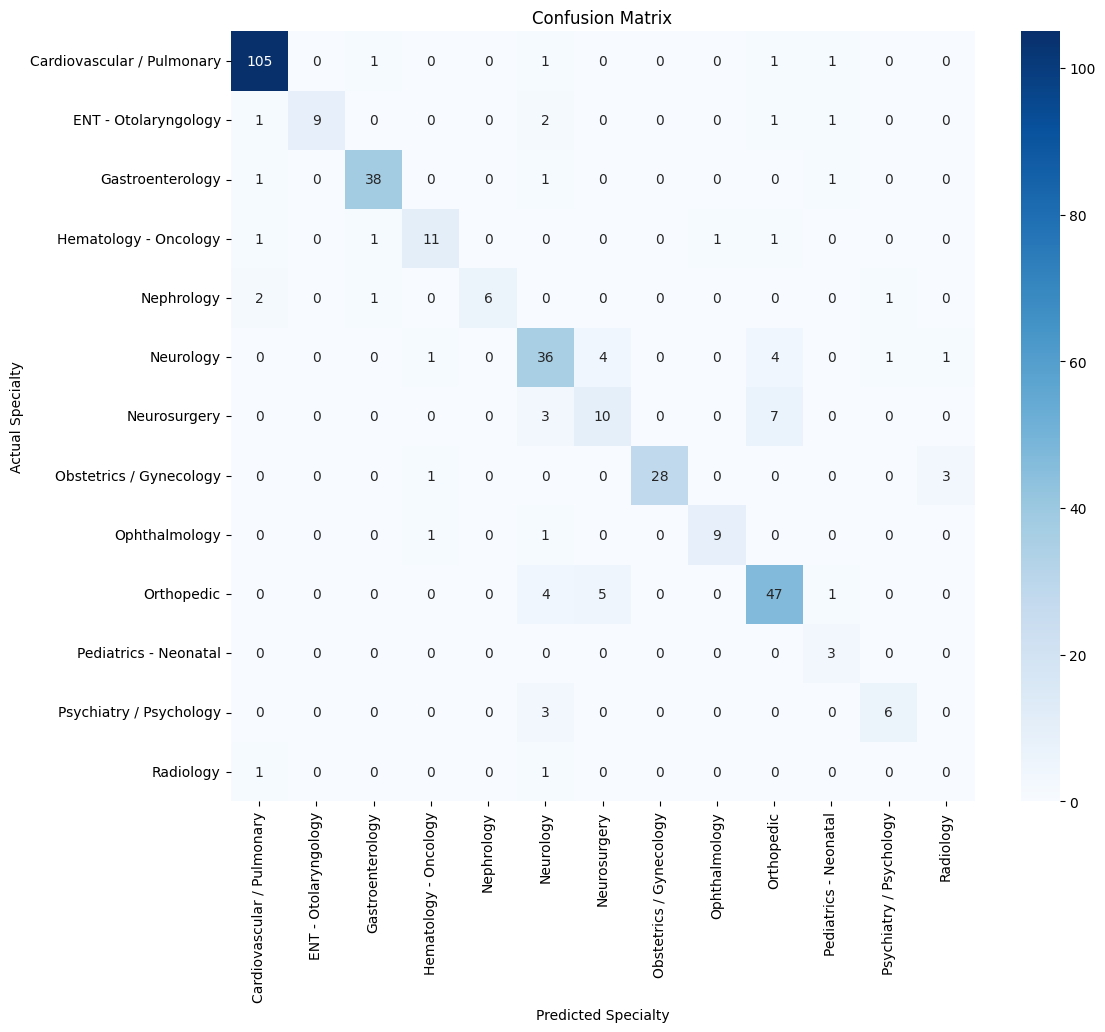

In [8]:
from sklearn.metrics import confusion_matrix, classification_report

y_test_pred = best_model.predict(df_test['combined_text'])
y_test_true = df_test['medical_specialty']

cm = confusion_matrix(y_test_true, y_test_pred, labels=best_model.classes_)

# Plot heatmap
plt.figure(figsize=(12,10))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=best_model.classes_,
            yticklabels=best_model.classes_)
plt.ylabel("Actual Specialty")
plt.xlabel("Predicted Specialty")
plt.title("Confusion Matrix")
plt.show()

In [9]:
report = classification_report(y_test_true, y_test_pred, target_names=best_model.classes_)
print("📄 Classification Report:\n", report)

📄 Classification Report:
                             precision    recall  f1-score   support

Cardiovascular / Pulmonary       0.95      0.96      0.95       109
      ENT - Otolaryngology       1.00      0.64      0.78        14
          Gastroenterology       0.93      0.93      0.93        41
     Hematology - Oncology       0.79      0.73      0.76        15
                Nephrology       1.00      0.60      0.75        10
                 Neurology       0.69      0.77      0.73        47
              Neurosurgery       0.53      0.50      0.51        20
   Obstetrics / Gynecology       1.00      0.88      0.93        32
             Ophthalmology       0.90      0.82      0.86        11
                Orthopedic       0.77      0.82      0.80        57
     Pediatrics - Neonatal       0.43      1.00      0.60         3
   Psychiatry / Psychology       0.75      0.67      0.71         9
                 Radiology       0.00      0.00      0.00         2

                  ac

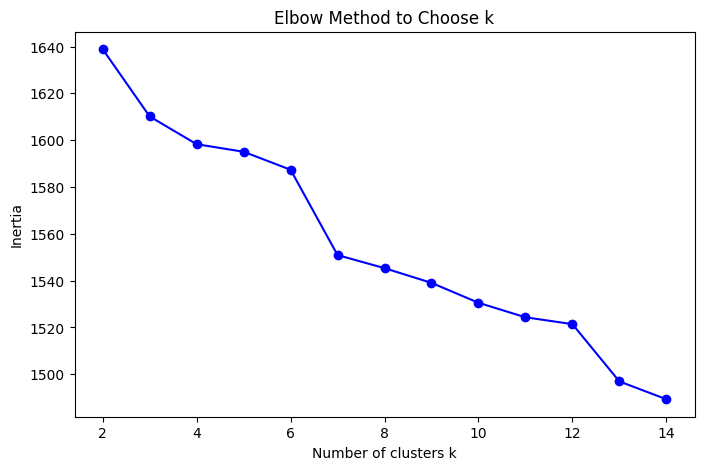

Cluster 0: nan, history, patient, nan nan, pain, report, past, year, time, normal
Cluster 1: artery, coronary, coronary artery, catheterization, angiography, pulmonary, catheter, right, stenosis, femoral
Cluster 2: pulmonary, atrial, cardiovascular pulmonary, valve, stress, cardiovascular, heart, chest, aortic, ventricular
Cluster 3: lobe, tumor, brain, pulmonary, mri, neurology, right, fetal, unremarkable, mass
Cluster 4: lumbar, l5, l4, disc, l4 l5, disk, s1, spinal, root, l5 s1
Cluster 5: cervical, anterior, discectomy, c5, patient, c6, fracture, orthopedic, c4, place
Cluster 6: sample reports, reports, sample, medical transcription, transcription sample, transcription, transcribed, accuracy quality, andare, andare reference
Cluster 7: knee, carpal, ligament, tunnel, tendon, carpal tunnel, medial, orthopedic, patella, meniscus
Cluster 8: history, nan, nan nan, patient, mg, daily, deny, past, pain, disease
Cluster 9: gastroenterology, laparoscopic, abdomen, colon, abdominal, uterus, 

In [13]:

X_tfidf = vectorizer.fit_transform(df_train['combined_text'])

inertia = []
K = range(2, 15)  # try 2–15 clusters
for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_tfidf)
    inertia.append(km.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K, inertia, 'bo-')
plt.xlabel("Number of clusters k")
plt.ylabel("Inertia")
plt.title("Elbow Method to Choose k")
plt.show()

k = 10
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_tfidf)

# Cluster labels for each document
clusters = kmeans.labels_
df_train['cluster'] = clusters

terms = vectorizer.get_feature_names_out()

for i in range(k):
    cluster_center = kmeans.cluster_centers_[i]
    top_idx = cluster_center.argsort()[-10:][::-1]  # top 10 words
    top_terms = [terms[ind] for ind in top_idx]
    print(f"Cluster {i}: {', '.join(top_terms)}")